##Entendendo e analisando os dados com Python


**Dicionário de Dados**
- PassengerId: Número de identificação do passageiro
- Survived: Informa se o passageiro sobreviveu ao desastre
0 = Não
1 = Sim
- Pclass: Classe do bilhete
1 = 1ª Classe
2 = 2ª Classe
3 = 3ª Classe
- Name: Nome do passageiro
- Sex: Sexo do passageiro
- Age: Idade do passageiro
- SibSp: Quantidade de cônjuges e irmãos a bordo
- Parch: Quantidade de pais e filhos a bordo
- Ticket: Número da passagem
- Fare: Preço da Passagem
- Cabin: Número da cabine do passageiro
- Embarked: Porto no qual o passageiro embarcou
C = Cherbourg
Q = Queenstown
S = Southampton

Análise dos dados do Titanic utilizando machine learning para modelos de regressão logística e árvore de decisão com acurácia em 80%

Disponível em: https://www.kaggle.com/c/titanic


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Informações estatísticas
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# identificar o tipo de cada variável
display(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# ver a porcentagem valores faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

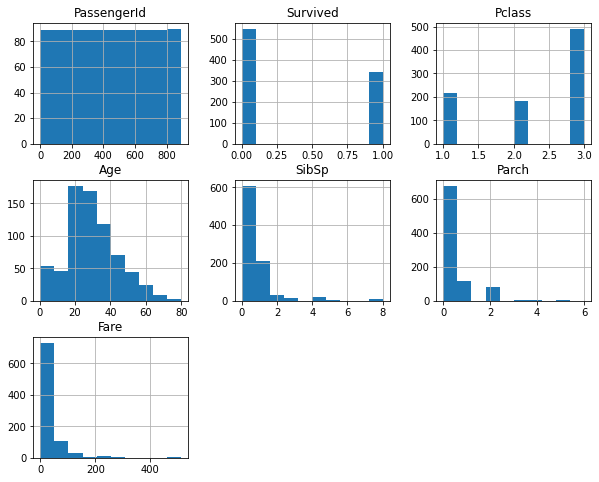

In [8]:
train.hist(figsize=(10,8));

In [9]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


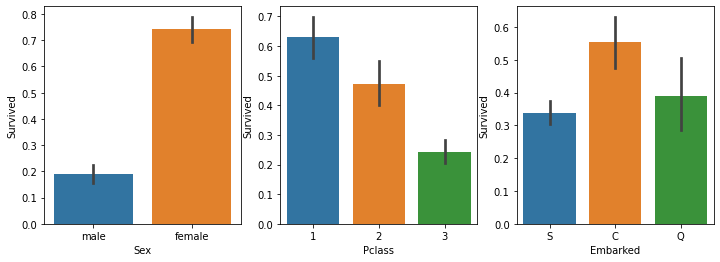

In [10]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1);
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2);
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


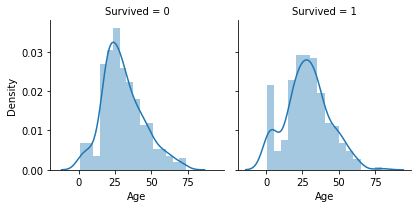

In [11]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

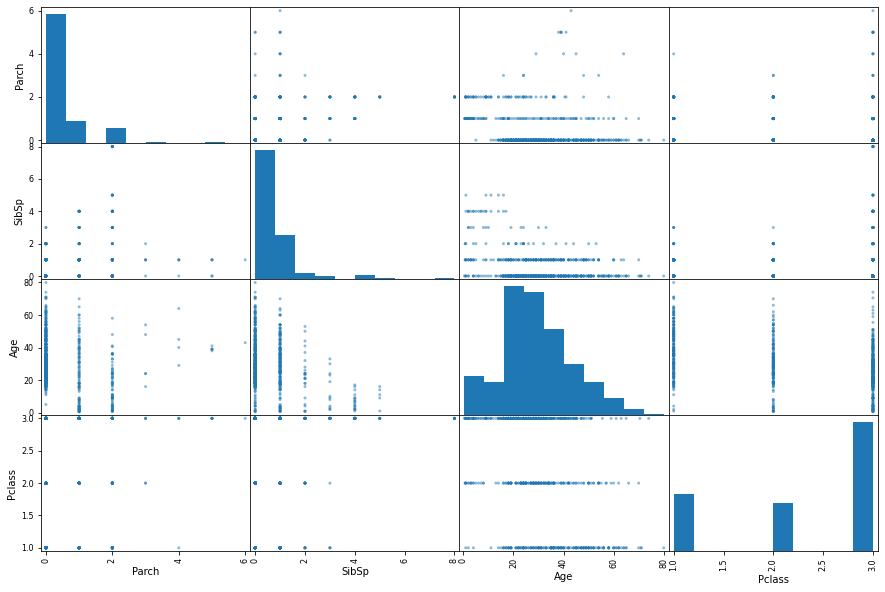

In [ ]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

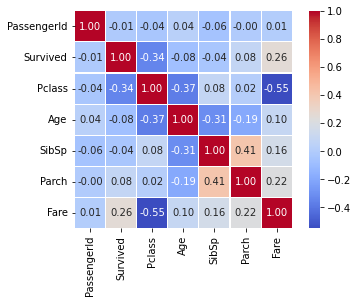

In [12]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [13]:
# Inclui análise descritiva
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Preparação dos dados

Para determinar se o passageiro sobreviveu ou não utilizaremos o modelo árvore de decisão. Esse modelo faz uma pergunta, ou uma série de perguntas e classifica as informações com base nas respostas. As classificações podem ser feitas com base em dados numéricos ou em respostas "sim/não".
Para calcular a probabilidade de sobrevivência a feature 'Survived' será a target

In [14]:
# importando métodos
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [15]:
# dados faltantes
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
train.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


In [19]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
#  vamos desconsiderar as variáveis ['PassengerId', 'Name', 'Ticket', 'Cabin'], pois aparentemente não parecem relevantes.
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [21]:
# Para as variáveis idade e tarifa, vou colocar o valor da mediana, e para a variável do porto de embarque, vou colocar o valor com maior frequência.

# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

In [22]:
# preparar variáveis para o modelo

# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


In [23]:
# recuperar datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

##Treinando modelo de Machine Learning

- Regressão Logística
- Árvore de decisão

In [24]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [25]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [27]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13
